In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the dataset
df = pd.read_csv(r'c:\Users\MYSELF\Downloads\in-vehicle-coupon-recommendation.csv')

In [21]:
print(df.head())
print(df.info())

       destination  passanger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  ...  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner  ...   
1           Coffee House         2h  Female  21  Unmarried partner  ...   
2  Carry out & Take away         2h  Female  21  Unmarried partner  ...   
3           Coffee House         2h  Female  21  Unmarried partner  ...   
4           Coffee House         1d  Female  21  Unmarried partner  ...   

   CoffeeHouse CarryAway RestaurantLessThan20 Restaurant20To50  \
0        never       NaN                  4~8              1~3   
1        never       NaN                  4~8           

In [22]:
# Drop columns with more than 40% missing values
threshold = 0.4 * len(df)
df = df.dropna(thresh=threshold, axis=1)

# Fill missing values in categorical columns with mode
categorical_columns = [
    'destination', 'passanger', 'weather', 'time', 'coupon', 'expiration',
    'gender', 'age', 'maritalStatus', 'education', 'occupation', 'income',
    'Bar', 'CoffeeHouse', 'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50'
]



In [23]:
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].fillna(df[col].mode()[0])

# Handle inconsistencies in categorical data
# Example: Standardize the CoffeeHouse column values
df['CoffeeHouse'] = df['CoffeeHouse'].replace({'less1': 'Less than 1', '1~3': '1 to 3', '4~8': '4 to 8', 'gt8': 'More than 8'})


In [24]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, columns=['destination', 'weather', 'coupon'], drop_first=True)

# List of numerical columns to scale
numerical_columns = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Scale numerical columns
scaler = StandardScaler()
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

# Display the cleaned and processed dataset
print("\nCleaned and Processed Dataset:")
print(df_encoded.head())
print(df_encoded.info())


Cleaned and Processed Dataset:
   passanger  temperature  time expiration  gender age      maritalStatus  \
0      Alone    -0.433430   2PM         1d  Female  21  Unmarried partner   
1  Friend(s)     0.871799  10AM         2h  Female  21  Unmarried partner   
2  Friend(s)     0.871799  10AM         2h  Female  21  Unmarried partner   
3  Friend(s)     0.871799   2PM         2h  Female  21  Unmarried partner   
4  Friend(s)     0.871799   2PM         1d  Female  21  Unmarried partner   

   has_children                 education  occupation  ... direction_opp  Y  \
0             1  Some college - no degree  Unemployed  ...             1  1   
1             1  Some college - no degree  Unemployed  ...             1  0   
2             1  Some college - no degree  Unemployed  ...             1  1   
3             1  Some college - no degree  Unemployed  ...             1  0   
4             1  Some college - no degree  Unemployed  ...             1  0   

  destination_No Urgent Place 

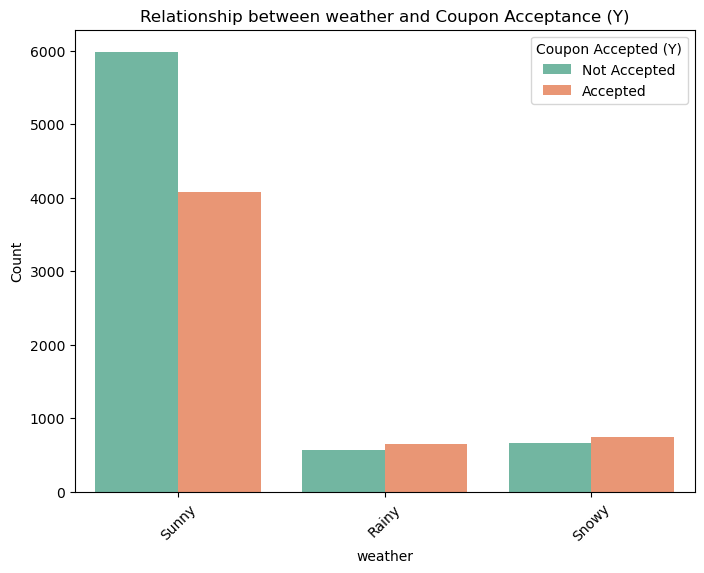

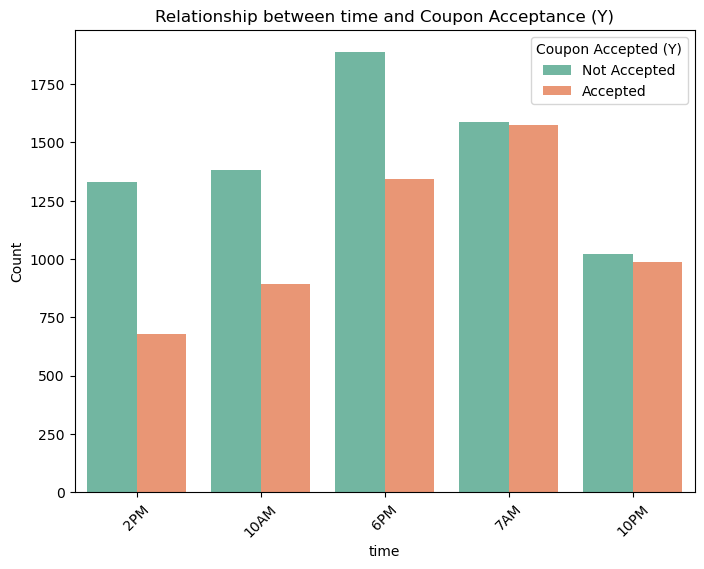

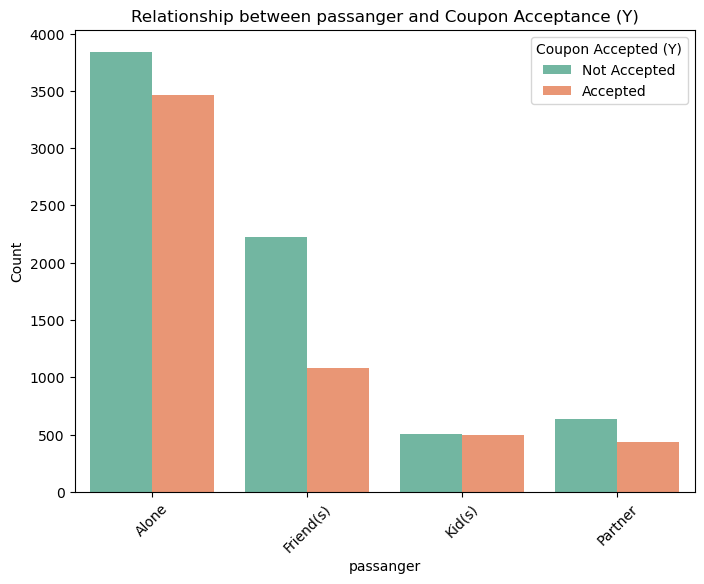

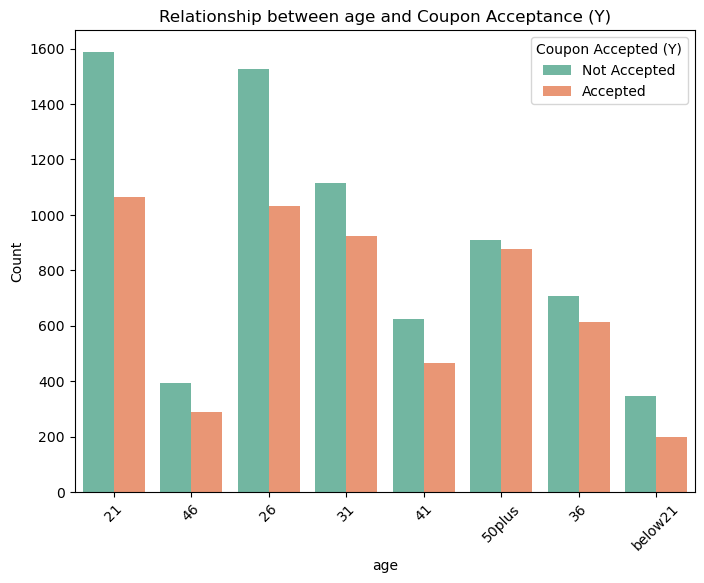

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
# Ensure the target variable (Y) is categorical
df['Y'] = df['Y'].astype(str)  # Convert Y to string for plotting purposes

# Updated visualization code
categorical_features = ['weather', 'time', 'passanger', 'age']

for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=feature, hue='Y', palette='Set2')
    plt.title(f'Relationship between {feature} and Coupon Acceptance (Y)')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.legend(title='Coupon Accepted (Y)', labels=['Not Accepted', 'Accepted'])
    plt.xticks(rotation=45)
    plt.show()



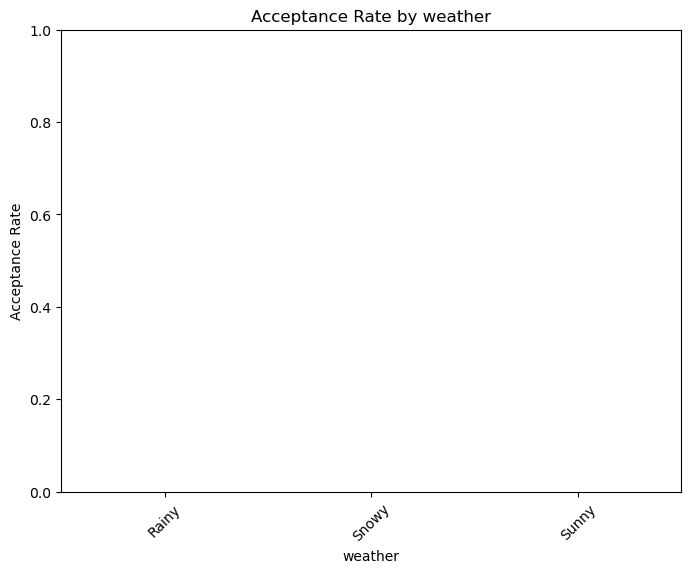

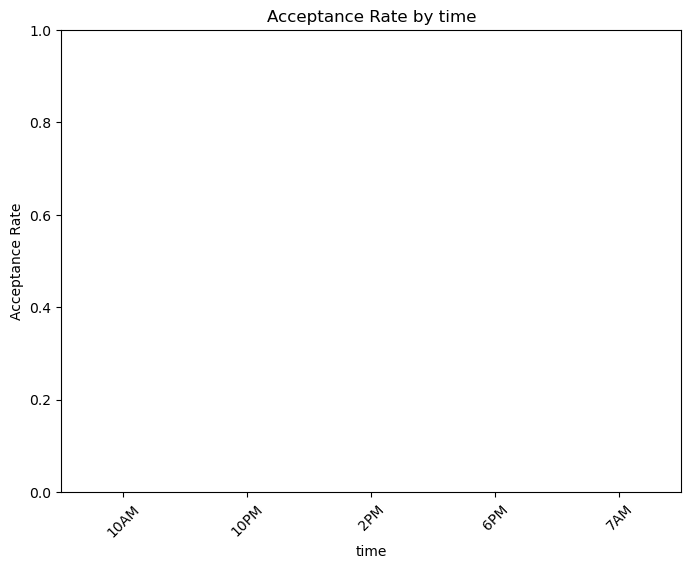

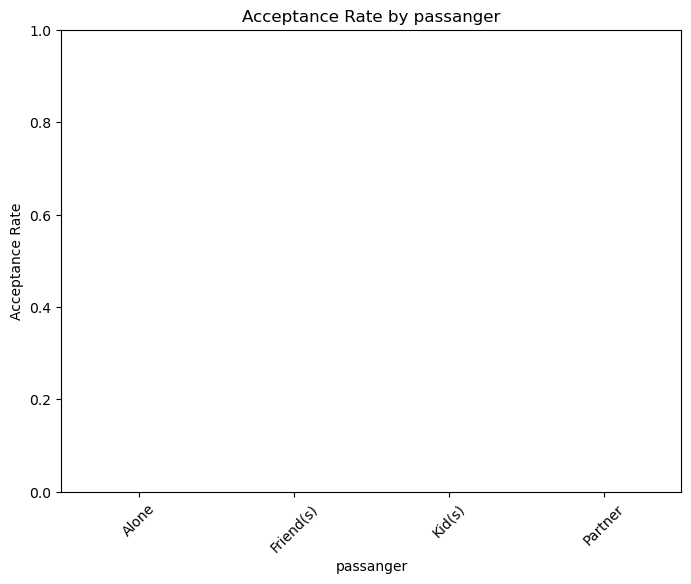

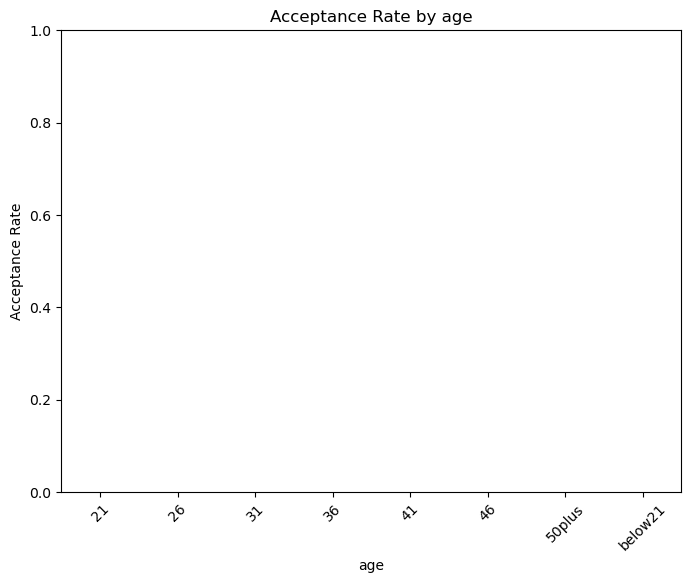

In [26]:
# Calculate acceptance rates for each categorical feature
for feature in categorical_features:
    acceptance_rates = df.groupby(feature)['Y'].mean().reset_index()
    plt.figure(figsize=(8, 6))
    sns.barplot(data=acceptance_rates, x=feature, y='Y', palette='viridis')
    plt.title(f'Acceptance Rate by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Acceptance Rate')
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.show()


In [27]:
# Convert 'Y' back to numeric if it was modified
df['Y'] = pd.to_numeric(df['Y'], errors='coerce')

# Define numerical columns for correlation
numerical_columns = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Compute correlation matrix (explicitly setting numeric_only=True)
correlations = df[numerical_columns + ['Y']].corr(numeric_only=True)

# Display correlation matrix and sort by Y
print("Correlation Matrix:")
if 'Y' in correlations:
    print(correlations['Y'].sort_values(ascending=False))
else:
    print("The target variable 'Y' is not present in the correlation matrix.")



Correlation Matrix:
Y                    1.000000
temperature          0.061240
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64


In [28]:
# Select numerical columns for correlation
numerical_columns = ['temperature', 'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min']

# Compute correlation with the target variable
correlations = df[numerical_columns + ['Y']].corr()
print("Correlation Matrix:")
print(correlations['Y'].sort_values(ascending=False))


Correlation Matrix:
Y                    1.000000
temperature          0.061240
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64


C:\Users\MYSELF\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


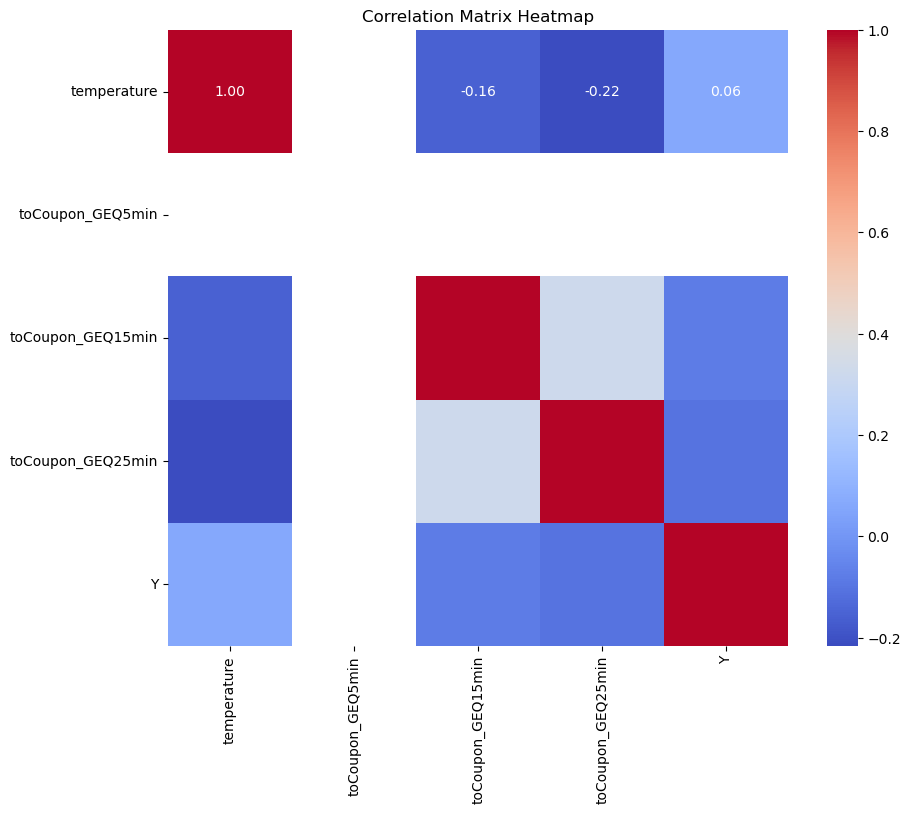

In [29]:
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlations, 
    annot=True, 
    fmt=".2f",  # Specify the annotation format explicitly
    cmap="coolwarm", 
    cbar=True
)
plt.title("Correlation Matrix Heatmap")
plt.show()

Model Performance Comparison:
                 Model  Accuracy  Precision    Recall  F1-Score
0  Logistic Regression  0.682302   0.699498  0.773232  0.734519
1        Decision Tree  0.683879   0.723776  0.717753  0.720752
2        Random Forest  0.752464   0.755975  0.833564  0.792876


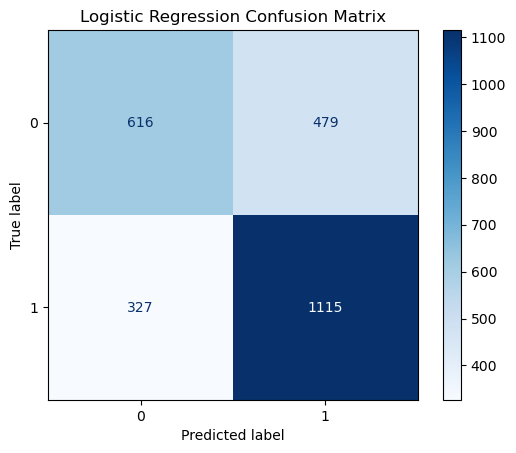

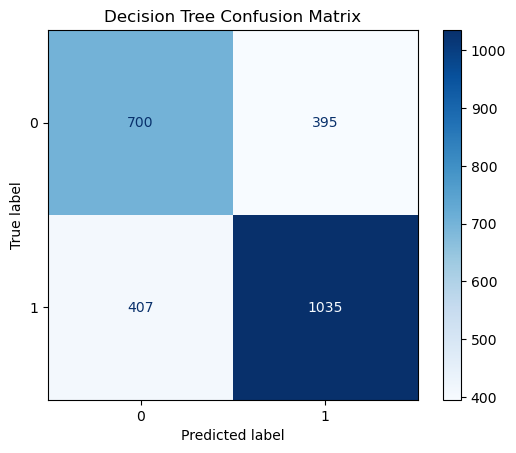

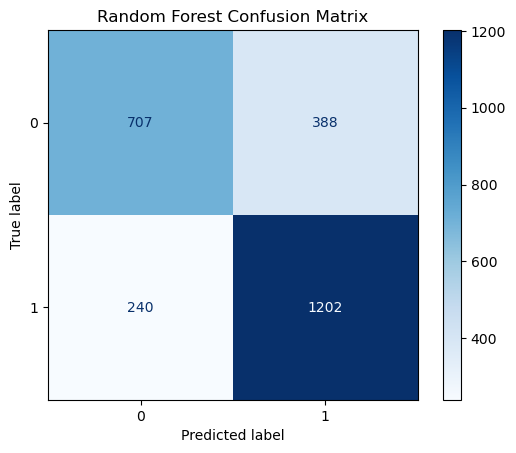

In [34]:
# Week 3: Machine Learning Models
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

# Use your dataset
# Assuming `df` is the cleaned and pre-processed dataset
# Features (X) and Target (Y)
X = df.drop(columns=['Y'])  # Drop the target column
y = df['Y']  # Target column

# Identify categorical and numerical columns
categorical_columns = X.select_dtypes(include=['object', 'category']).columns
numerical_columns = X.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing for numerical and categorical features
numerical_transformer = SimpleImputer(strategy='mean')  # Fill missing values for numerical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing values for categorical data
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # One-hot encode categorical data
])

# Combine preprocessors in a ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Split data into Training (80%) and Testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize models
logistic_model = LogisticRegression(random_state=42, max_iter=500)
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Create pipelines for each model
logistic_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', logistic_model)])
decision_tree_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', decision_tree_model)])
random_forest_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', random_forest_model)])

# Train models
logistic_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)

# Predict on test data
y_pred_logistic = logistic_pipeline.predict(X_test)
y_pred_tree = decision_tree_pipeline.predict(X_test)
y_pred_forest = random_forest_pipeline.predict(X_test)

# Evaluate Models
def evaluate_model(model_name, y_test, y_pred):
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
    }

# Collect results
results = [
    evaluate_model("Logistic Regression", y_test, y_pred_logistic),
    evaluate_model("Decision Tree", y_test, y_pred_tree),
    evaluate_model("Random Forest", y_test, y_pred_forest),
]

# Display results in a DataFrame
results_df = pd.DataFrame(results)
print("Model Performance Comparison:")
print(results_df)

# Confusion Matrices
def plot_confusion_matrix(model_name, y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
    disp.plot(cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.show()

# Plot confusion matrices for all models
plot_confusion_matrix("Logistic Regression", y_test, y_pred_logistic)
plot_confusion_matrix("Decision Tree", y_test, y_pred_tree)
plot_confusion_matrix("Random Forest", y_test, y_pred_forest)





In [ ]:

# Define categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Define preprocessing for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine preprocessors in a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Create a pipeline with preprocessing and the model
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'classifier__max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'classifier__min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'classifier__min_samples_leaf': [1, 2, 4]    # Minimum samples required at a leaf node
}

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid,
    cv=3,  # 3-fold cross-validation
    scoring='f1',  # Use F1 score for evaluation
    verbose=2,
    n_jobs=-1  # Use all available processors
)

# Perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Display best parameters and performance
print("Best parameters found by GridSearchCV:", grid_search.best_params_)
best_model = grid_search.best_estimator_


Fitting 3 folds for each of 108 candidates, totalling 324 fits


In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define categorical and numerical columns
categorical_features = X_train.select_dtypes(include=['object']).columns
numerical_features = X_train.select_dtypes(include=['int64', 'float64']).columns

# Preprocessing steps for numerical and categorical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler())  # Scale numerical features
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),  # Handle missing values
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Encode categorical features
])

# Combine into a single preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Build pipelines for models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

logistic_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression())
])

decision_tree_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(random_state=42))
])

random_forest_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Train models
logistic_pipeline.fit(X_train, y_train)
decision_tree_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)

# Evaluate the tuned model
best_model = random_forest_pipeline  # Replace with your actual tuned model if different
y_pred_tuned = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_tuned)
precision = precision_score(y_test, y_pred_tuned)
recall = recall_score(y_test, y_pred_tuned)
f1 = f1_score(y_test, y_pred_tuned)

print(f"Tuned Random Forest Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Comparison of Models
print("Comparison of Models:")

# Logistic Regression
y_pred_logistic = logistic_pipeline.predict(X_test)
print(f"Logistic Regression F1-Score: {f1_score(y_test, y_pred_logistic):.4f}")

# Decision Tree
y_pred_tree = decision_tree_pipeline.predict(X_test)
print(f"Decision Tree F1-Score: {f1_score(y_test, y_pred_tree):.4f}")

# Random Forest (before tuning)
y_pred_rf = random_forest_pipeline.predict(X_test)
print(f"Random Forest F1-Score (Before Tuning): {f1_score(y_test, y_pred_rf):.4f}")

# Tuned Random Forest
print(f"Tuned Random Forest F1-Score: {f1:.4f}")


Tuned Random Forest Model Performance:
Accuracy: 0.7533
Precision: 0.7566
Recall: 0.8343
F1-Score: 0.7935
Comparison of Models:
Logistic Regression F1-Score: 0.7336
Decision Tree F1-Score: 0.7208
Random Forest F1-Score (Before Tuning): 0.7935
Tuned Random Forest F1-Score: 0.7935


In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)
